In [ ]:
## Install the library
!pip install textblob
!pip install pandas
!pip install sweetviz
!pip install pandas_profiling

In [1]:
# Importing the libraray
import pandas as pd
from textblob import TextBlob
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import string
from nltk.corpus import stopwords
from pandas_profiling import ProfileReport
import sweetviz

In [3]:
df = pd.read_json('/Users/abhisheknegi/Desktop/Rapid/Project/scrapy/scrapy/dineout/data/dineout-delhi.json')
df

,Name,Rating,Total votes,Total Review,Link,User Name,Post Date,Review
0,Out Of The Box Courtyard,4.1,360 votes,60 Reviews,https://www.dineout.co.in/delhi/out-of-the-box...,Lolo,Posted on 01 Aug 2021,Did not give me table and also asked me to can...
1,38 Barracks,4.3,1351 votes,132 Reviews,https://www.dineout.co.in/delhi/38-barracks-co...,Pankaj,Posted on 25 Jul 2021,really good
2,Out Of The Box Courtyard,4.1,360 votes,60 Reviews,https://www.dineout.co.in/delhi/out-of-the-box...,Vikram,Posted on 31 Jul 2021,Food very spicy and service was not that great...
3,Out Of The Box Courtyard,4.1,360 votes,60 Reviews,https://www.dineout.co.in/delhi/out-of-the-box...,Utsa Madan,Posted on 07 Jul 2021,"Loved the ambience, they have an outdoor & as ..."
4,Out Of The Box Courtyard,4.1,360 votes,60 Reviews,https://www.dineout.co.in/delhi/out-of-the-box...,Lovely,Posted on 07 Jul 2021,Otb is very beautiful place with finger lickin...
...,...,...,...,...,...,...,...,...
39587,My Bar Headquarters,4.0,2558 votes,341 Reviews,https://www.dineout.co.in/delhi/my-bar-headqua...,jolly singhal,Posted on 18 Jun 2019,it was good experience in my bar. food was ver...
39588,My Bar Headquarters,4.0,2558 votes,341 Reviews,https://www.dineout.co.in/delhi/my-bar-headqua...,Siddharth Kumar,Posted on 04 Jun 2019,nothing \n
39589,Berco's,4.3,1423 votes,193 Reviews,https://www.dineout.co.in/delhi/bercos-connaug...,Karan Khandelwal,Posted on 03 Feb 2020,good
39590,Berco's,4.3,1423 votes,193 Reviews,https://www.dineout.co.in/delhi/bercos-connaug...,Priyanshu Saxena,Posted on 01 Feb 2020,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39592 entries, 0 to 39591
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          39592 non-null  object 
 1   Rating        39592 non-null  float64
 2   Total votes   39592 non-null  object 
 3   Total Review  39592 non-null  object 
 4   Link          39592 non-null  object 
 5   User Name     39592 non-null  object 
 6   Post Date     39592 non-null  object 
 7   Review        39592 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.4+ MB


In [5]:
df.describe()

,Rating
count,39592.000000
mean,4.166074
std,0.327535
min,1.000000
25%,4.000000
50%,4.200000
75%,4.400000
max,5.000000


In [6]:
df['Total votes'] = df['Total votes'].apply(lambda x: int(x.replace('votes', '')))
df['Total Review'] = df['Total Review'].apply(lambda x: int(x.replace('Reviews', '')))

In [7]:
df.head()

,Name,Rating,Total votes,Total Review,Link,User Name,Post Date,Review
0,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Lolo,Posted on 01 Aug 2021,Did not give me table and also asked me to can...
1,38 Barracks,4.3,1351,132,https://www.dineout.co.in/delhi/38-barracks-co...,Pankaj,Posted on 25 Jul 2021,really good
2,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Vikram,Posted on 31 Jul 2021,Food very spicy and service was not that great...
3,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Utsa Madan,Posted on 07 Jul 2021,"Loved the ambience, they have an outdoor & as ..."
4,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Lovely,Posted on 07 Jul 2021,Otb is very beautiful place with finger lickin...


In [8]:
df.describe()

,Rating,Total votes,Total Review
count,39592.000000,39592.000000,39592.000000
mean,4.166074,422.327516,58.923217
std,0.327535,542.006620,80.272136
min,1.000000,1.000000,1.000000
25%,4.000000,88.000000,15.000000
50%,4.200000,251.000000,38.000000
75%,4.400000,536.000000,69.000000
max,5.000000,5158.000000,837.000000


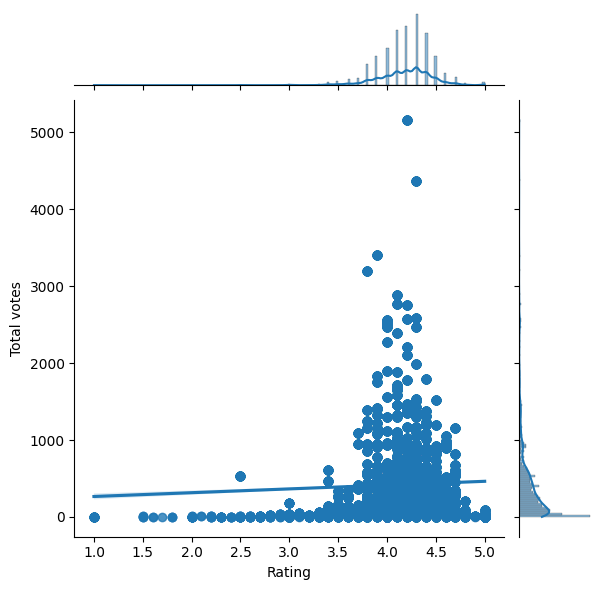

In [9]:
sns.jointplot(x='Rating',y='Total votes',data=df, kind='reg')

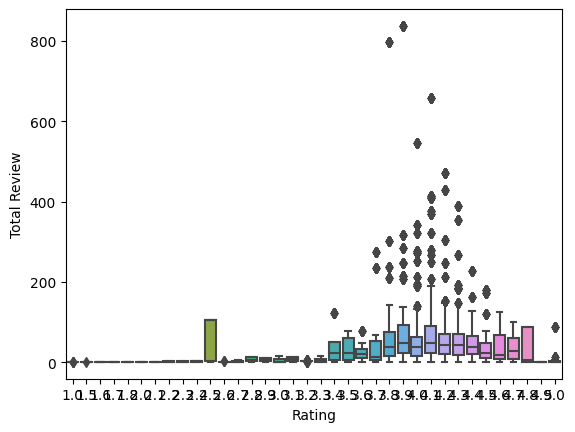

In [10]:
sns.boxplot(x='Rating', y='Total Review', data=df)
plt.show()

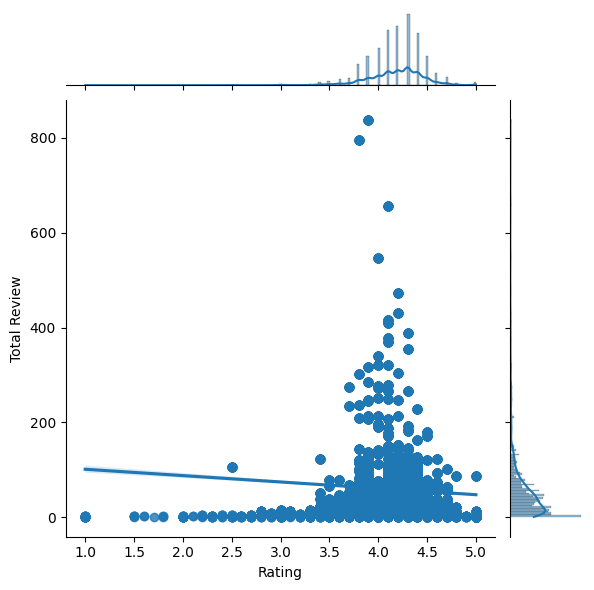

In [11]:
sns.jointplot(x='Rating', y='Total Review', data=df, kind='reg')

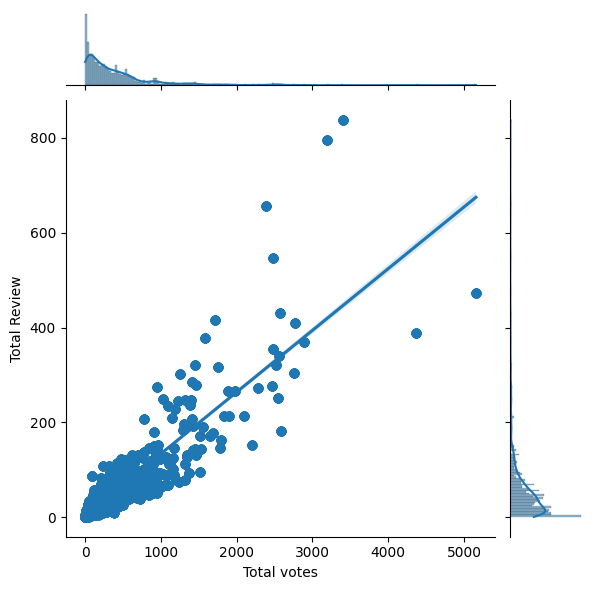

In [12]:
sns.jointplot(x='Total votes',y='Total Review',data=df, kind='reg')

<AxesSubplot:xlabel='Total Review', ylabel='count'>

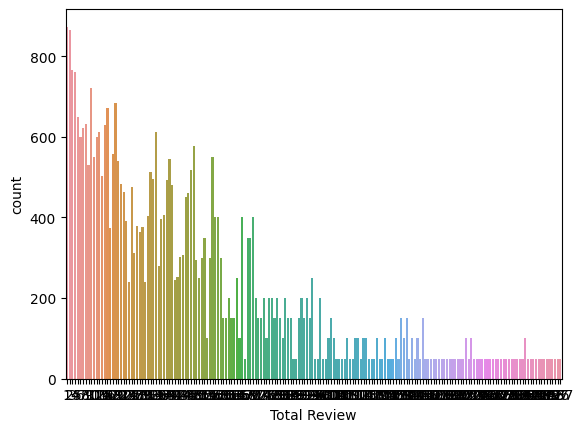

In [13]:
sns.countplot(x='Total Review',data=df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39592 entries, 0 to 39591
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          39592 non-null  object 
 1   Rating        39592 non-null  float64
 2   Total votes   39592 non-null  int64  
 3   Total Review  39592 non-null  int64  
 4   Link          39592 non-null  object 
 5   User Name     39592 non-null  object 
 6   Post Date     39592 non-null  object 
 7   Review        39592 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.4+ MB


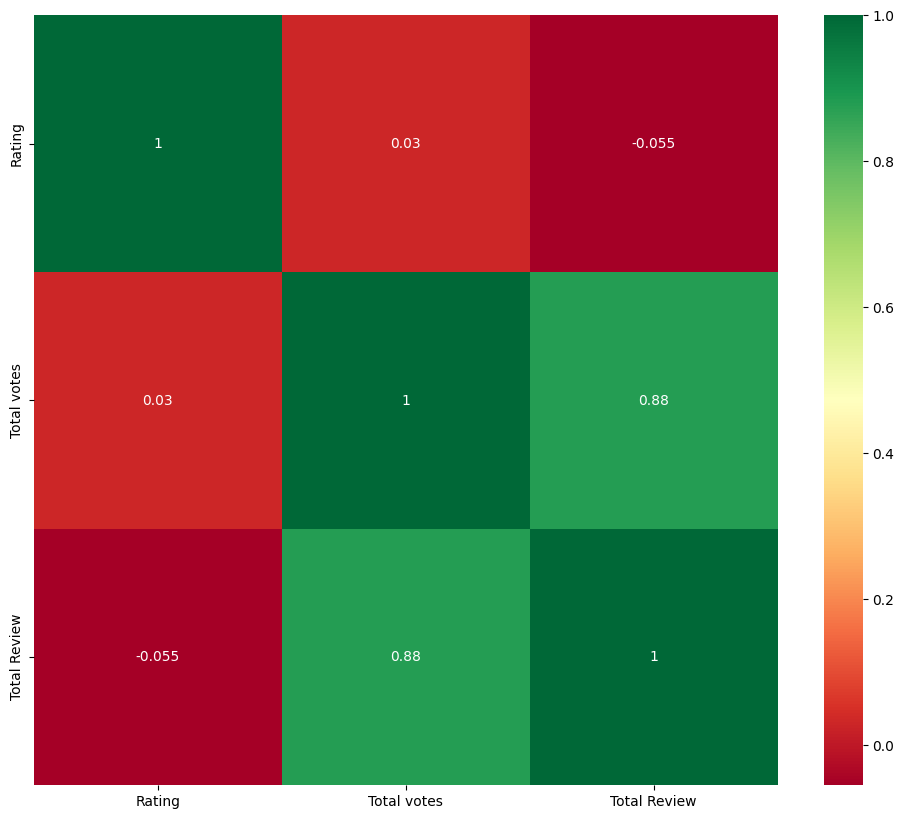

In [15]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [16]:
df.shape

(39592, 8)

In [17]:
df.isnull().sum()

Name            0
Rating          0
Total votes     0
Total Review    0
Link            0
User Name       0
Post Date       0
Review          0
dtype: int64

In [19]:
df.dropna(inplace=True, axis=0)
df.reset_index(drop=True, inplace=True)

In [20]:
df

,Name,Rating,Total votes,Total Review,Link,User Name,Post Date,Review
0,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Lolo,Posted on 01 Aug 2021,Did not give me table and also asked me to can...
1,38 Barracks,4.3,1351,132,https://www.dineout.co.in/delhi/38-barracks-co...,Pankaj,Posted on 25 Jul 2021,really good
2,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Vikram,Posted on 31 Jul 2021,Food very spicy and service was not that great...
3,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Utsa Madan,Posted on 07 Jul 2021,"Loved the ambience, they have an outdoor & as ..."
4,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Lovely,Posted on 07 Jul 2021,Otb is very beautiful place with finger lickin...
...,...,...,...,...,...,...,...,...
39587,My Bar Headquarters,4.0,2558,341,https://www.dineout.co.in/delhi/my-bar-headqua...,jolly singhal,Posted on 18 Jun 2019,it was good experience in my bar. food was ver...
39588,My Bar Headquarters,4.0,2558,341,https://www.dineout.co.in/delhi/my-bar-headqua...,Siddharth Kumar,Posted on 04 Jun 2019,nothing \n
39589,Berco's,4.3,1423,193,https://www.dineout.co.in/delhi/bercos-connaug...,Karan Khandelwal,Posted on 03 Feb 2020,good
39590,Berco's,4.3,1423,193,https://www.dineout.co.in/delhi/bercos-connaug...,Priyanshu Saxena,Posted on 01 Feb 2020,good


In [22]:
df.corr()

,Rating,Total votes,Total Review
Rating,1.000000,0.029823,-0.054739
Total votes,0.029823,1.000000,0.877600
Total Review,-0.054739,0.877600,1.000000


In [24]:
df.describe()

,Rating,Total votes,Total Review
count,39592.000000,39592.000000,39592.000000
mean,4.166074,422.327516,58.923217
std,0.327535,542.006620,80.272136
min,1.000000,1.000000,1.000000
25%,4.000000,88.000000,15.000000
50%,4.200000,251.000000,38.000000
75%,4.400000,536.000000,69.000000
max,5.000000,5158.000000,837.000000


In [29]:
df.duplicated().sum() 

5

In [35]:
df.columns

Index(['Name', 'Rating', 'Total votes', 'Total Review', 'Link', 'User Name',
       'Post Date', 'Review'],
      dtype='object')

# Distribution of Rating

/Users/abhisheknegi/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


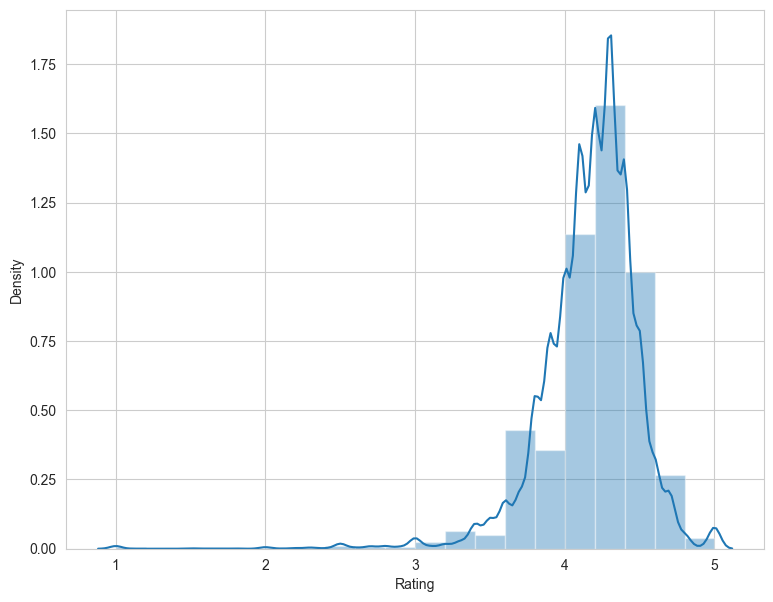

In [47]:
# # Lets Explore our target variable - How ratings are distributed
plt.figure(figsize=(9,7))
sns.distplot(df['Rating'],bins=20)
plt.show()

/Users/abhisheknegi/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


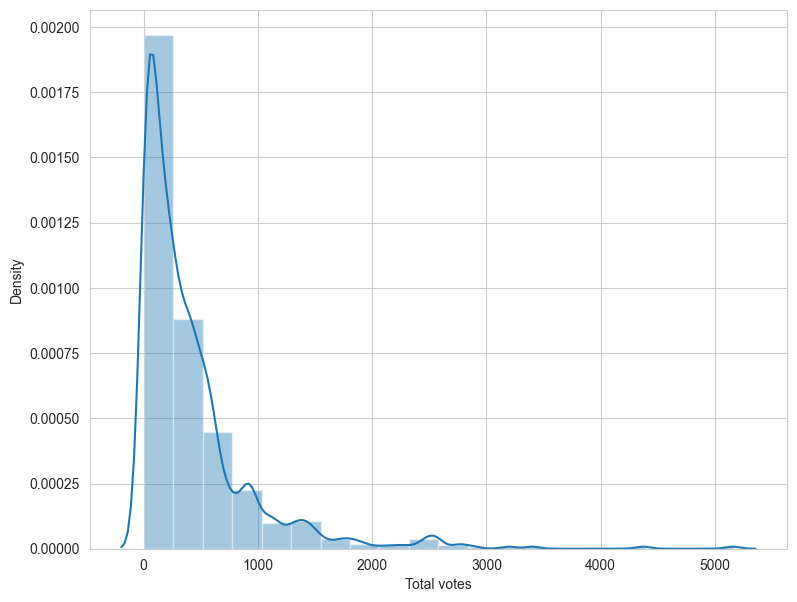

In [48]:
# # Lets Explore our target variable - How ratings are distributed
plt.figure(figsize=(9,7))
sns.distplot(df['Total votes'],bins=20)
plt.show()

/Users/abhisheknegi/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


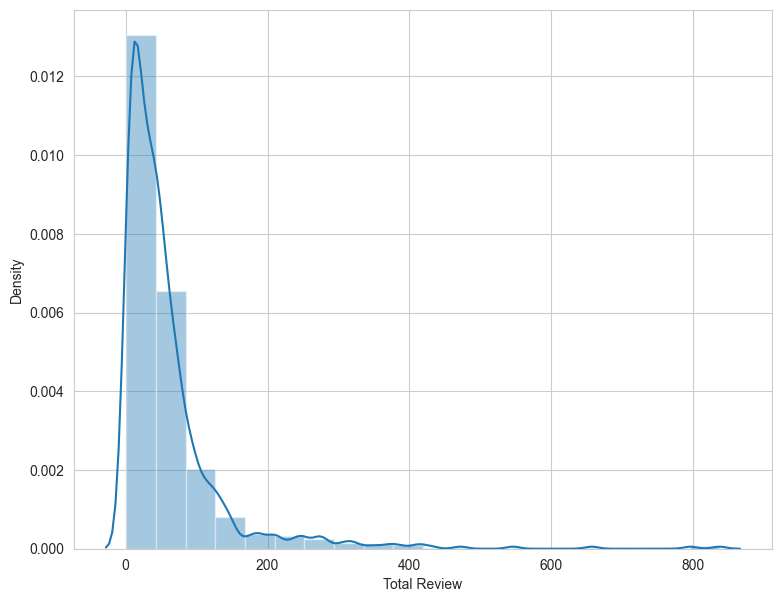

In [49]:
# # Lets Explore our target variable - How ratings are distributed
plt.figure(figsize=(9,7))
sns.distplot(df['Total Review'],bins=20)
plt.show()

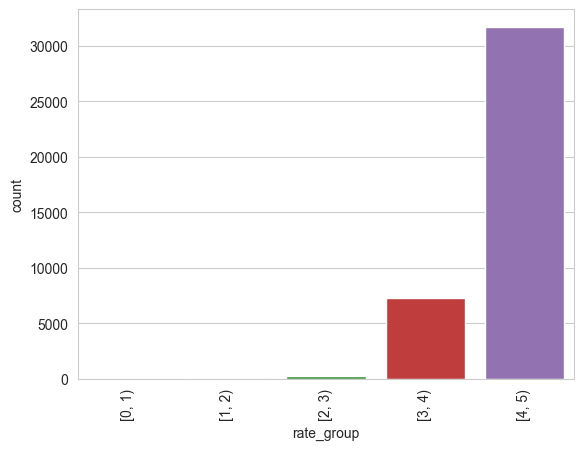

In [46]:
# Pandas cut to draw histogram of different range between 1 to 5
bins = list(range(0, 6, 1))
np.random.seed(31415)

df_test = pd.DataFrame({'rate': df['Rating'].astype(float), 
                        'rate_group': pd.cut(df['Rating'].astype(float), bins=bins, right=False)})

ax = sns.countplot(data=df_test, x='rate_group')
ax.tick_params(axis='x', labelrotation=90)

# Most Famous Restaurant

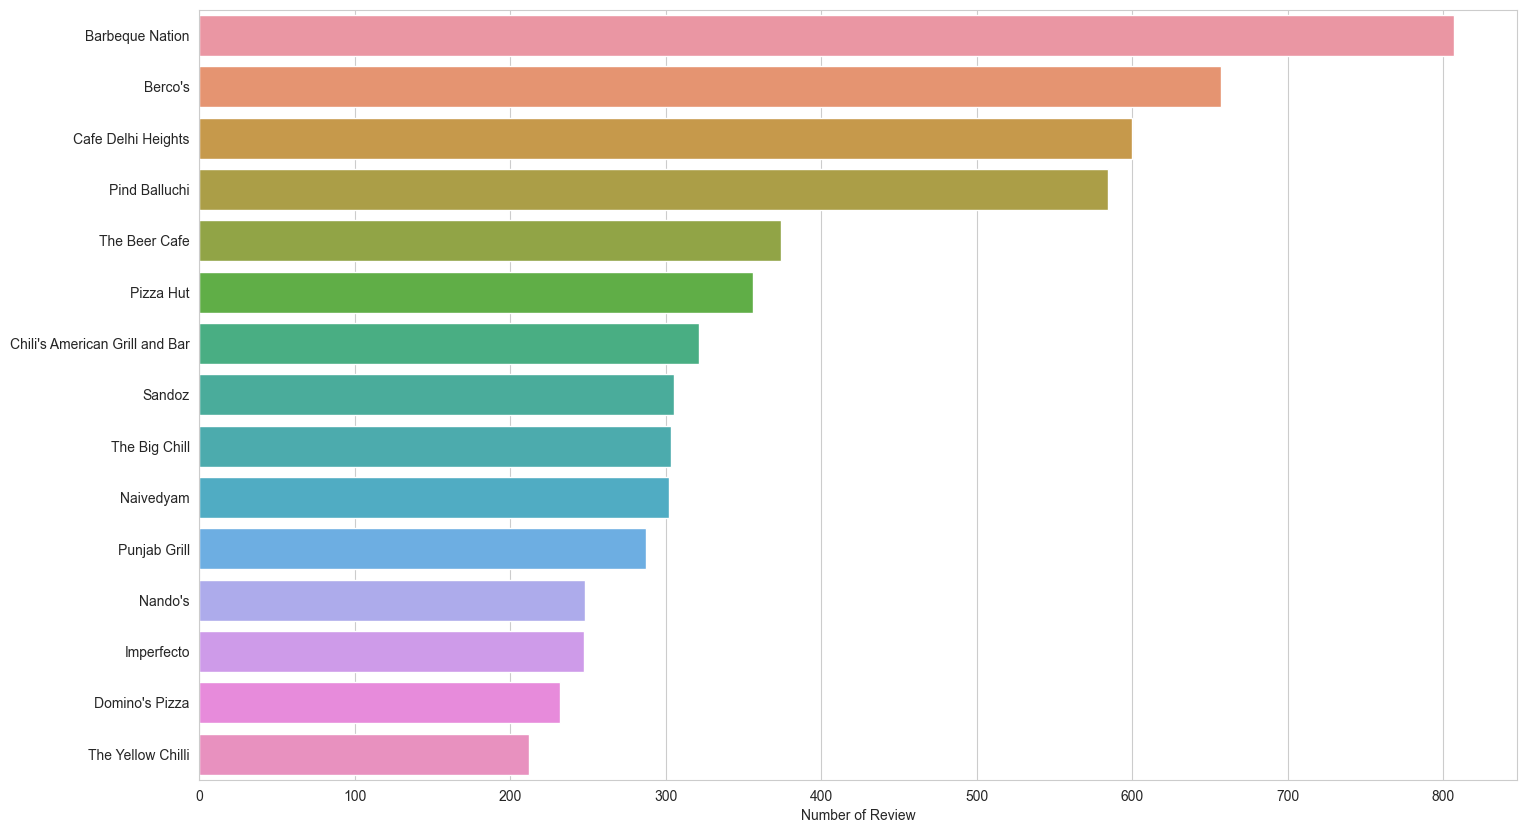

In [106]:
plt.figure(figsize=(17,10))
famous_restaurant = df['Name'].value_counts()[:15]
sns.barplot(x = famous_restaurant,y = famous_restaurant.index)
plt.xlabel("Number of Review")
plt.show()

In [54]:
df[df['Name'] == 'Barbeque Nation']

,Name,Rating,Total votes,Total Review,Link,User Name,Post Date,Review
812,Barbeque Nation,4.3,633,129,https://www.dineout.co.in/delhi/barbeque-natio...,balram,Posted on 25 Jul 2021,Neither food nor customer service both were no...
838,Barbeque Nation,4.3,633,129,https://www.dineout.co.in/delhi/barbeque-natio...,Rohit Kajal,Posted on 11 Jul 2021,Non-veg food is great .\n\nbut \n\nveg food ha...
839,Barbeque Nation,4.3,633,129,https://www.dineout.co.in/delhi/barbeque-natio...,SACHIN KAPOOR,Posted on 17 Apr 2021,PRICES ARE HIGH COMPARE TO FOOD & OTHER COMPET...
886,Barbeque Nation,4.3,633,129,https://www.dineout.co.in/delhi/barbeque-natio...,Sarika Gulati,Posted on 08 Apr 2021,very nice staff and food quality was very good
887,Barbeque Nation,4.3,633,129,https://www.dineout.co.in/delhi/barbeque-natio...,Manoj Saini,Posted on 08 Apr 2021,Mr Shankar & Mr Pradeep serve very well. Their...
...,...,...,...,...,...,...,...,...
37114,Barbeque Nation,4.4,547,116,https://www.dineout.co.in/delhi/barbeque-natio...,Naman Krishna,Posted on 22 Feb 2020,It was a very nice experience with Barbeque Na...
37115,Barbeque Nation,4.4,547,116,https://www.dineout.co.in/delhi/barbeque-natio...,Jyoti Rani,Posted on 05 Feb 2020,food is not good. All items are in same taste....
37116,Barbeque Nation,4.4,547,116,https://www.dineout.co.in/delhi/barbeque-natio...,Gaurav Mittal,Posted on 21 Jan 2020,service
37117,Barbeque Nation,4.4,547,116,https://www.dineout.co.in/delhi/barbeque-natio...,Richa Pali,Posted on 06 Jan 2020,great....but please keep the music low


In [60]:
# Restaurant Name based rated Restaurants
restaurants_rating = df.groupby(by = ["Name"])["Rating"].agg(["count", "mean"])
restaurants_rating

,count,mean
Name,,
#3BROS,33,4.1
1 Oak Cafe & Bar,50,4.2
1900 AD- A Kitchen Love Story,1,5.0
1911,15,4.4
21 Gun Salute,46,4.3
...,...,...
Ziuba,16,4.1
Zodiac-All Day Dining,2,4.0
Zooby's Kitchen,8,4.4


Text(0, 0.5, 'Ratings Count')

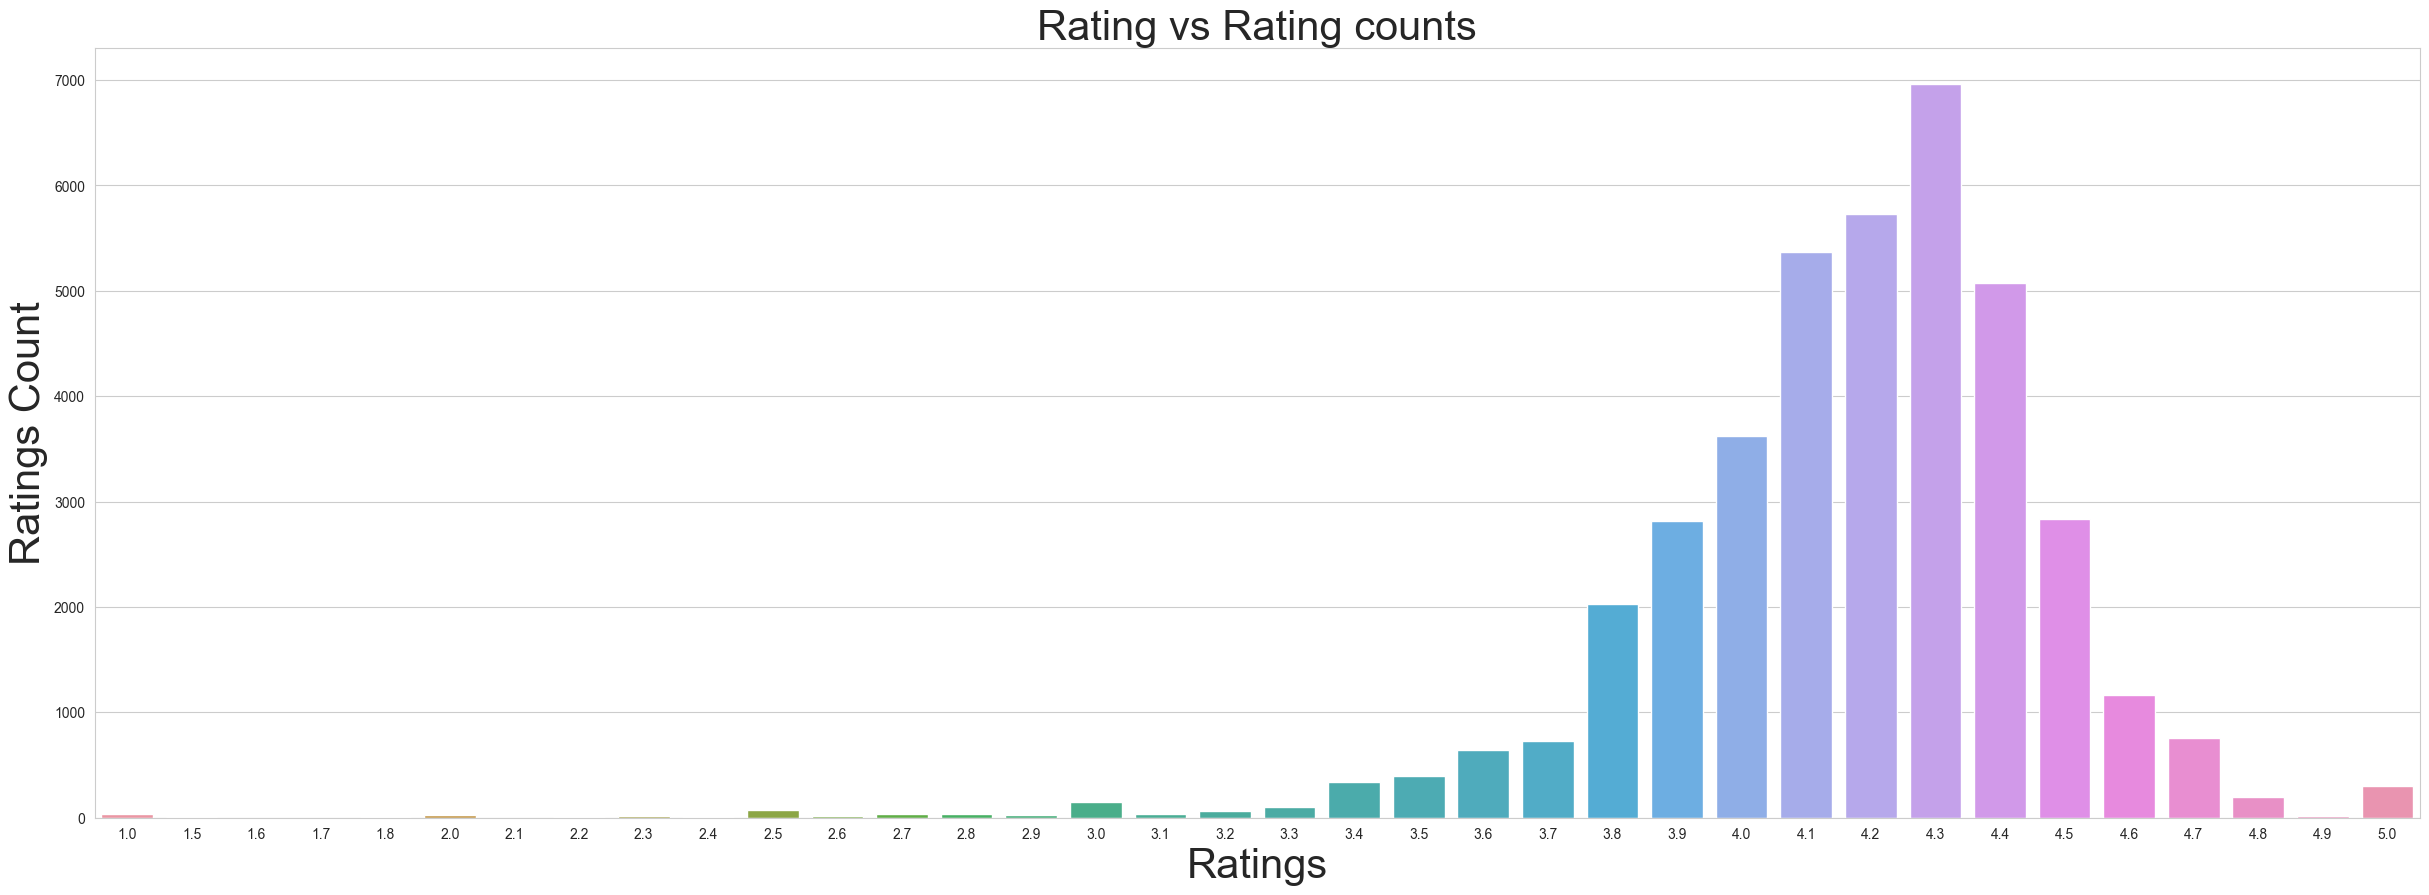

In [72]:
ratings=df.groupby(['Rating']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(30,10))
sns.barplot(x='Rating',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)

In [85]:
def perform_sentiment(x):
    testimonial = TextBlob(x)
    #testimonial.sentiment (polarity, subjectvity)
    testimonial.sentiment.polarity
    #sentiment_list.append([sentence, testimonial.sentiment.polarity, testimonial.subjectivity])
    return testimonial.sentiment.polarity

In [157]:
df['Perform Sentiment'] = df['Clean Review'].apply(perform_sentiment)

In [172]:
df['Review'][0]

'Did not give me table and also asked me to cancel I was 10 minutes late'

In [158]:
df

,Name,Rating,Total votes,Total Review,Link,User Name,Post Date,Review,Perform Sentiment,Clean Review
0,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Lolo,Posted on 01 Aug 2021,Did not give me table and also asked me to can...,-0.300000,Did give table also asked cancel I 10 minutes ...
1,38 Barracks,4.3,1351,132,https://www.dineout.co.in/delhi/38-barracks-co...,Pankaj,Posted on 25 Jul 2021,really good,0.700000,really good
2,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Vikram,Posted on 31 Jul 2021,Food very spicy and service was not that great...,0.750000,Food spicy service great good ambience
3,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Utsa Madan,Posted on 07 Jul 2021,"Loved the ambience, they have an outdoor & as ...",0.338528,Loved ambience outdoor well indoor seating are...
4,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Lovely,Posted on 07 Jul 2021,Otb is very beautiful place with finger lickin...,0.270000,Otb beautiful place finger licking food totall...
...,...,...,...,...,...,...,...,...,...,...
39587,My Bar Headquarters,4,2558,341,https://www.dineout.co.in/delhi/my-bar-headqua...,jolly singhal,Posted on 18 Jun 2019,it was good experience in my bar. food was ver...,0.850000,good experience bar food delicious
39588,My Bar Headquarters,4,2558,341,https://www.dineout.co.in/delhi/my-bar-headqua...,Siddharth Kumar,Posted on 04 Jun 2019,nothing \n,0.000000,nothing
39589,Berco's,4.3,1423,193,https://www.dineout.co.in/delhi/bercos-connaug...,Karan Khandelwal,Posted on 03 Feb 2020,good,0.700000,good
39590,Berco's,4.3,1423,193,https://www.dineout.co.in/delhi/bercos-connaug...,Priyanshu Saxena,Posted on 01 Feb 2020,good,0.700000,good


In [112]:
my_report = sweetviz.analyze([df, "EDA"],target_feat='Rating')

                                             |                                                                …

In [113]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [116]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [117]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [118]:
profile.to_file("output.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [173]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [174]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [152]:
# Let's word tokenize the given sample after we remove the stopwords and punctuation. 
stop_words = stopwords.words('english')
punct = string.punctuation

def clean_sentence(data):
    clean_data =[]
    for word in nltk.word_tokenize(data):
        if word not in punct:
            if word not in stop_words:
                clean_data.append(word)
    return ' '.join(clean_data)

In [155]:
df['Clean Review'] = df['Review'].apply(clean_sentence)

In [175]:
df['Review'][0]

'Did not give me table and also asked me to cancel I was 10 minutes late'

In [176]:
df['Clean Review'][0]

'Did give table also asked cancel I 10 minutes late'

In [159]:
df

,Name,Rating,Total votes,Total Review,Link,User Name,Post Date,Review,Perform Sentiment,Clean Review
0,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Lolo,Posted on 01 Aug 2021,Did not give me table and also asked me to can...,-0.300000,Did give table also asked cancel I 10 minutes ...
1,38 Barracks,4.3,1351,132,https://www.dineout.co.in/delhi/38-barracks-co...,Pankaj,Posted on 25 Jul 2021,really good,0.700000,really good
2,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Vikram,Posted on 31 Jul 2021,Food very spicy and service was not that great...,0.750000,Food spicy service great good ambience
3,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Utsa Madan,Posted on 07 Jul 2021,"Loved the ambience, they have an outdoor & as ...",0.338528,Loved ambience outdoor well indoor seating are...
4,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Lovely,Posted on 07 Jul 2021,Otb is very beautiful place with finger lickin...,0.270000,Otb beautiful place finger licking food totall...
...,...,...,...,...,...,...,...,...,...,...
39587,My Bar Headquarters,4,2558,341,https://www.dineout.co.in/delhi/my-bar-headqua...,jolly singhal,Posted on 18 Jun 2019,it was good experience in my bar. food was ver...,0.850000,good experience bar food delicious
39588,My Bar Headquarters,4,2558,341,https://www.dineout.co.in/delhi/my-bar-headqua...,Siddharth Kumar,Posted on 04 Jun 2019,nothing \n,0.000000,nothing
39589,Berco's,4.3,1423,193,https://www.dineout.co.in/delhi/bercos-connaug...,Karan Khandelwal,Posted on 03 Feb 2020,good,0.700000,good
39590,Berco's,4.3,1423,193,https://www.dineout.co.in/delhi/bercos-connaug...,Priyanshu Saxena,Posted on 01 Feb 2020,good,0.700000,good


In [167]:
df['Clean Review Length'] = df['Clean Review'].astype(str).apply(len)
df['Clean Review Word Count'] = df['Clean Review'].apply(lambda x: len(str(x).split()))

In [168]:
df

,Name,Rating,Total votes,Total Review,Link,User Name,Post Date,Review,Perform Sentiment,Clean Review,Clean Review Length,Clean Review Word Count
0,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Lolo,Posted on 01 Aug 2021,Did not give me table and also asked me to can...,-0.300000,Did give table also asked cancel I 10 minutes ...,50,10
1,38 Barracks,4.3,1351,132,https://www.dineout.co.in/delhi/38-barracks-co...,Pankaj,Posted on 25 Jul 2021,really good,0.700000,really good,11,2
2,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Vikram,Posted on 31 Jul 2021,Food very spicy and service was not that great...,0.750000,Food spicy service great good ambience,38,6
3,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Utsa Madan,Posted on 07 Jul 2021,"Loved the ambience, they have an outdoor & as ...",0.338528,Loved ambience outdoor well indoor seating are...,291,47
4,Out Of The Box Courtyard,4.1,360,60,https://www.dineout.co.in/delhi/out-of-the-box...,Lovely,Posted on 07 Jul 2021,Otb is very beautiful place with finger lickin...,0.270000,Otb beautiful place finger licking food totall...,150,23
...,...,...,...,...,...,...,...,...,...,...,...,...
39587,My Bar Headquarters,4,2558,341,https://www.dineout.co.in/delhi/my-bar-headqua...,jolly singhal,Posted on 18 Jun 2019,it was good experience in my bar. food was ver...,0.850000,good experience bar food delicious,34,5
39588,My Bar Headquarters,4,2558,341,https://www.dineout.co.in/delhi/my-bar-headqua...,Siddharth Kumar,Posted on 04 Jun 2019,nothing \n,0.000000,nothing,7,1
39589,Berco's,4.3,1423,193,https://www.dineout.co.in/delhi/bercos-connaug...,Karan Khandelwal,Posted on 03 Feb 2020,good,0.700000,good,4,1
39590,Berco's,4.3,1423,193,https://www.dineout.co.in/delhi/bercos-connaug...,Priyanshu Saxena,Posted on 01 Feb 2020,good,0.700000,good,4,1


In [169]:
text = " ".join(review for review in df['Clean Review'])

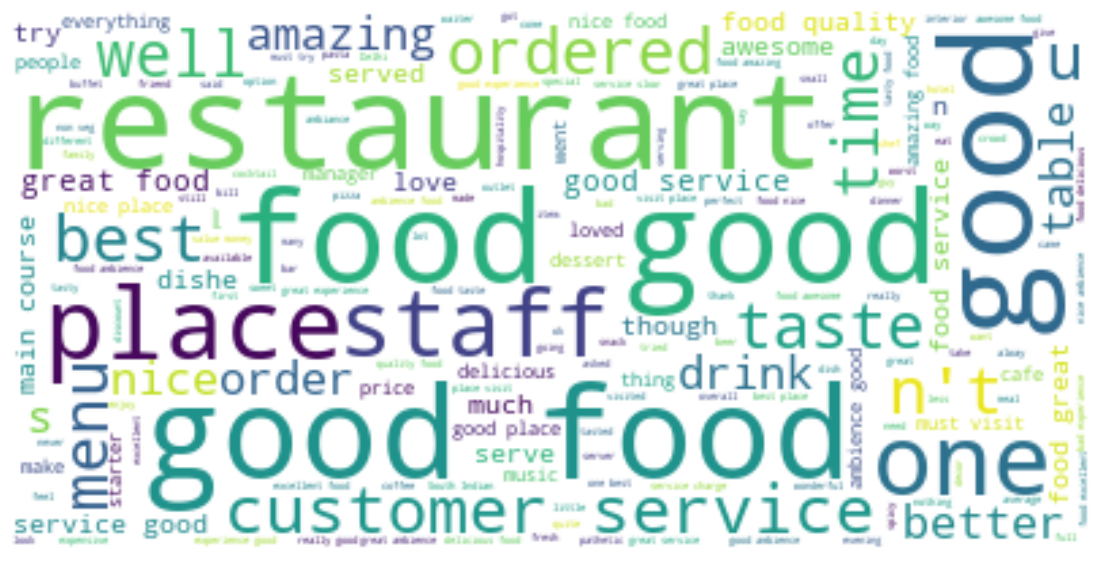

In [171]:
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()